# Bootstrap

## Données *air-conditioning*
Dans ce TP nous considérons des données concernant un système de climatisation. Les observations sont les durées (en heure) entre deux pannes de la climatisation (source: *Bootstrap methods and their application*, Davison & Hinkley, 1997). On s'intèresse à l'estimation du taux de défaillance. Celui est estimé par $T=1/\bar X_n$ où $X_i$ désignent les observations. Voici les données :


In [1]:
aircond <- c(487, 18, 85, 91, 5, 130, 230, 43, 98, 7, 100, 3)

## Question 1

Tracer l'histogramme des données **aircond**. Supposons que les données suivent une loi exponentielle $\mathcal E(\theta)$. Estimer le paramètre $\theta$ à partir des données et superposer la densité estimée à l'histogramme. Le choix de la loi exponentielle vous semble adéquat?

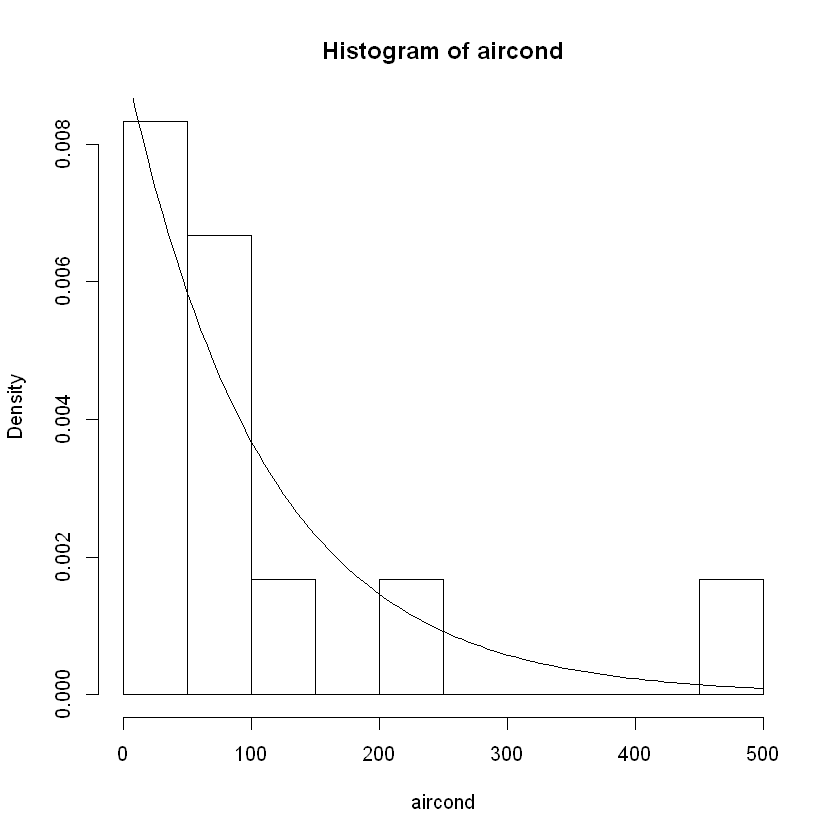

In [2]:
hist(aircond, freq=FALSE, breaks=8)
curve(dexp(x, 1/mean(aircond)), add=TRUE)

## Générer des échantillons bootstrap

Notons $x_1,\dots,x_n$ des réalisations i.i.d. d'une loi $F$.

Rappelons que l'on obtient un **échantillon bootstrap non paramétrique** en tirant avec remise des valeurs dans l'échantillon $(x_1,\dots,x_n)$.

Si on a un modèle paramétrique des données en sorte que $X_i\sim F_\theta$ avec un paramètre $\theta$ inconnu et si on dispose d'un estimateur $T$ de $\theta$, on créé un **échantillon bootstrap paramétrique** en simulant de la loi estimée $F_t$ où $t=T(x_1,\dots,x_n)$ est la valeur de l'estimateur sur les données observées.

## Question 2

- Créer trois échantillons bootstrap non paramétrique des données **aircond** (utiliser la fonction **sample**). Comparez les fonctions de répartition empiriques associées par un graphique (utiliser la fonction **ecdf**). Ajouter la fonction de répartition empirique des données **aircond**. Commentez.
- Créer trois échantillons bootstrap  paramétrique des données **aircond**. Plus précisément, supposons que les données sont i.i.d. de loi exponentielle. Comparez les fonctions de répartition empiriques associées par un graphique.  Ajouter la fonction de répartition empirique des données **aircond** ainsi que la fonction de répartition de la loi exponentielle ajustée. Commentez.

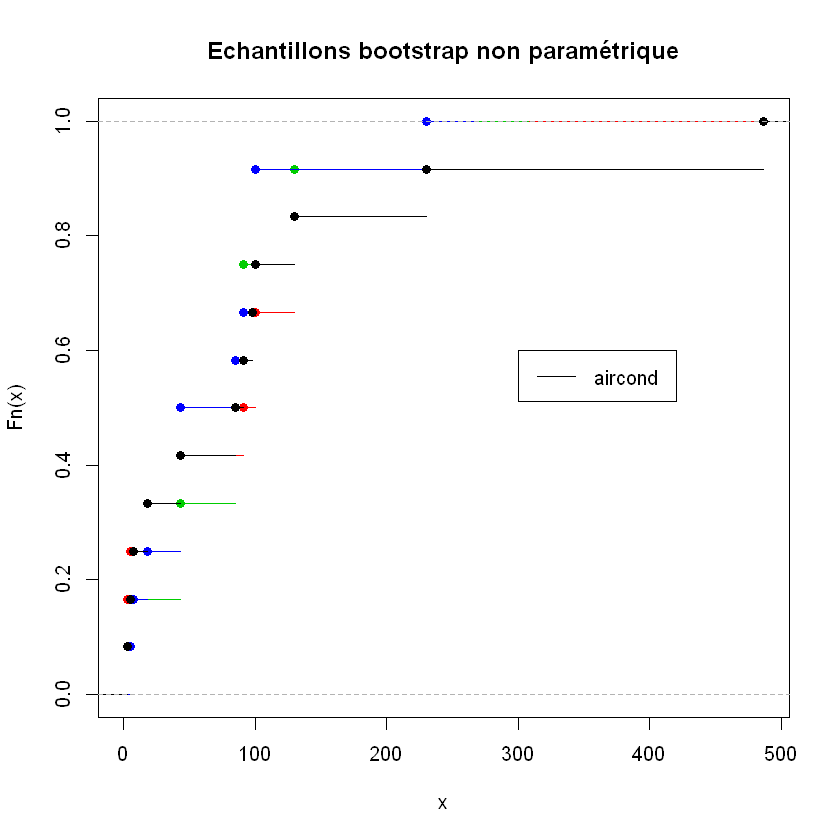

In [3]:
obs1.boot <- sample(aircond, replace=TRUE)
obs2.boot <- sample(aircond, replace=TRUE)
obs3.boot <- sample(aircond, replace=TRUE)
plot(ecdf(obs1.boot), xlim=c(0, max(aircond)), col=2, main='Echantillons bootstrap non paramétrique')
plot(ecdf(obs2.boot), add=TRUE, col=3)
plot(ecdf(obs3.boot), add=TRUE, col=4)
plot(ecdf(aircond), add=TRUE, col=1)
legend(300, .6, lty=1, legend='aircond')

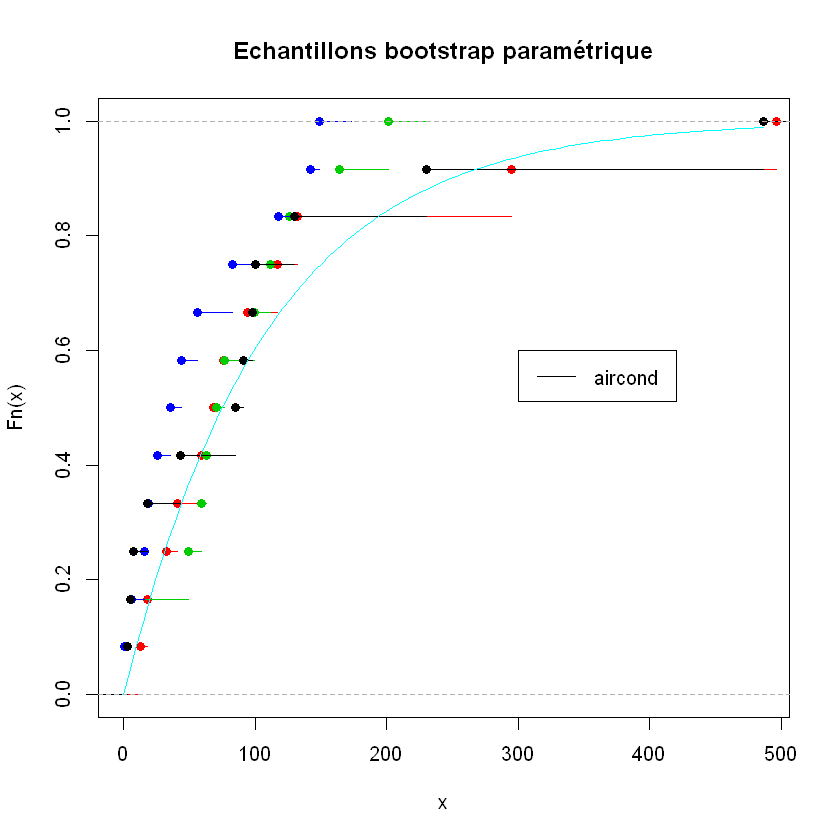

In [4]:
n <- length(aircond)
theta.hat <- 1/mean(aircond)
obs1.boot <- rexp(n, theta.hat)
obs2.boot <- rexp(n, theta.hat)
obs3.boot <- rexp(n, theta.hat)
plot(ecdf(obs1.boot), xlim=c(0, max(aircond)), col=2, main='Echantillons bootstrap paramétrique')
plot(ecdf(obs2.boot), add=TRUE, col=3)
plot(ecdf(obs3.boot), add=TRUE, col=4)
plot(ecdf(aircond), add=TRUE, col=1)
curve(pexp(x, theta.hat), add=TRUE,col=5)
legend(300, .6, lty=1, legend='aircond')

## Répliques bootstrap de l'estimateur

Selon le type d'échantillon bootstrap utilisé (paramétrique ou non), on obtient des **répliques bootstrap** paramétrique ou non paramétrique $T^*$ de l'estimateur $T$. Autrement dit, $T^*$ est la valeur de l'estimateur $T$ sur un échantillon bootstrap.

## Question 3

- Ecrire une fonction **boot.np** qui prend en argument le vecteur de données **obs** et le nombre **R** de répliques bootstrap de l'estimateur $T=1/\bar X_n$ souhaité. La fonction
génère **R** échantillons bootstrap non paramétrique sur lesquels l'estimateur $T$ est évalué et elle renvoie ces répliques bootstrap.
- Ecrire une fonction **boot.exp**  équivalente à la focntion **boot.np**, mais qui repose sur des échantillons bootstrap paramétriques dans le modèle des lois exponentielles.
- Afin de comparer la loi de l'estimateur $T$ à la loi de la réplique bootstrap (paramétrique ou non) $T^*$, écrire une fonction **estim.T** qui génère $R$ réalisations de l'estimateur $T$ à partir de $R$ échantillons simulées de taille $n$ de loi exponentielle $\mathcal E(\theta)$ (les valeurs de $\theta$, $n$ et $R$ sont à passer à la fonction en argument).

In [5]:
boot.np <- function(obs, R=1000){
  return(replicate(R, 1/mean(sample(obs, replace=TRUE))))
}

In [6]:
boot.exp <- function(obs, R=1000){
  n <- length(obs)
  theta.hat <- 1/mean(obs)  
  return(replicate(R, 1/mean(rexp(n, theta.hat))))
}

In [7]:
estim.T <- function(theta, n, R=1000){
    return(replicate(R, 1/mean(rexp(n, theta))))
}

## Question 4

- Pour les données **aircond** générer 1000 répliques bootstrap de l'estimateur **T** par les deux approches : paramétrique et non paramétrique. Stocker les vecteurs dans deux variables distinctes.
- Tracer l'histogramme des répliques bootstrap dans les deux cas. Tracer des QQ-plots pour comparer la distribution des deux vecteurs à la loi normale (fonction **qqnorm**). Que dire de la loi des répliques bootstrap ?
- Tracer les fonctions de répartition empiriques des deux vecteurs dans un même graphique.  Faire un QQ-plot pour comparer les distributions des deux vecteurs entre eux (fonction **qqplot**). Interprétez !
- Générer un très grand échantillon de la loi de $T$ avec $n=12$ et $\theta=t=$ valeur observée de $T$ sur les données **aircond**. Ensuite tracer des QQ-plots pour comparer les répliques bootstrap (paramétrique et non paramétrique) aux valeurs simulées de $T$. Interpréter.

In [8]:
estim.np <- boot.np(aircond, 1000)
estim.exp <- boot.exp(aircond, 1000)

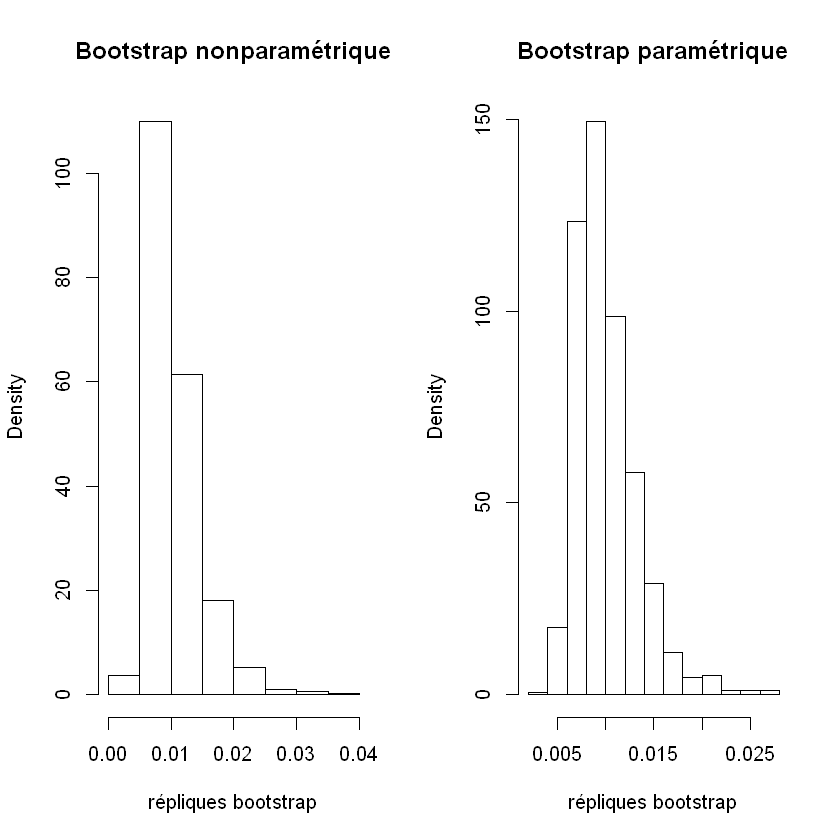

In [9]:
par(mfrow=c(1, 2))
hist(estim.np, freq=FALSE, main='Bootstrap nonparamétrique', xlab='répliques bootstrap')
hist(estim.exp, freq=FALSE, main='Bootstrap paramétrique', xlab='répliques bootstrap')

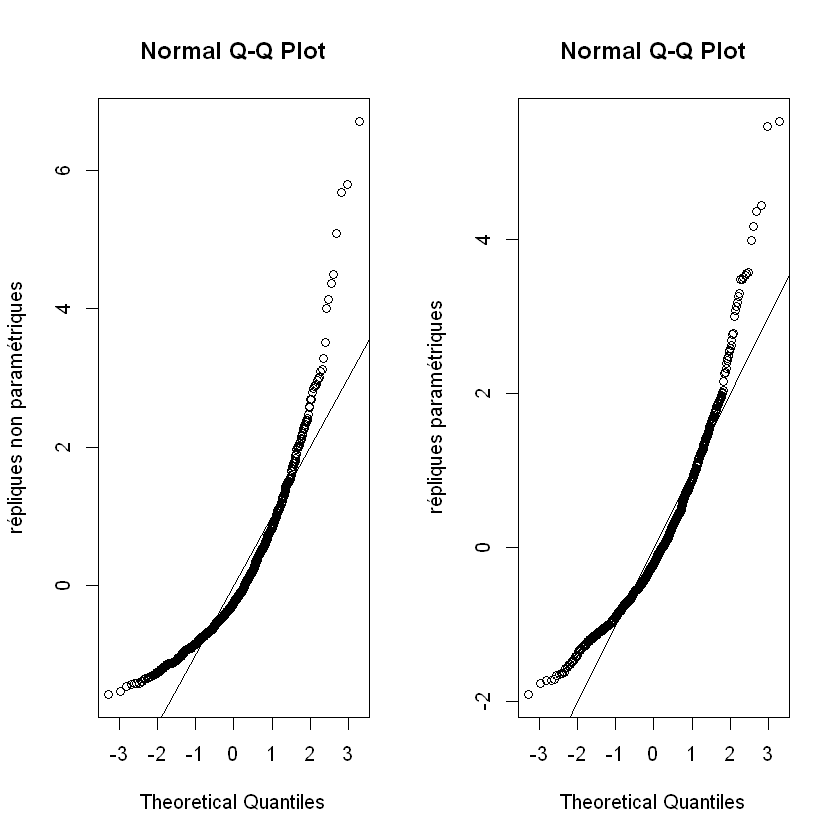

In [10]:
centreduit <- function(vec)
    return((vec-mean(vec))/sd(vec))

par(mfrow=c(1,2))
qqnorm(centreduit(estim.np), ylab='répliques non paramétriques')
abline(0,1)
qqnorm(centreduit(estim.exp), ylab='répliques paramétriques')
abline(0,1)

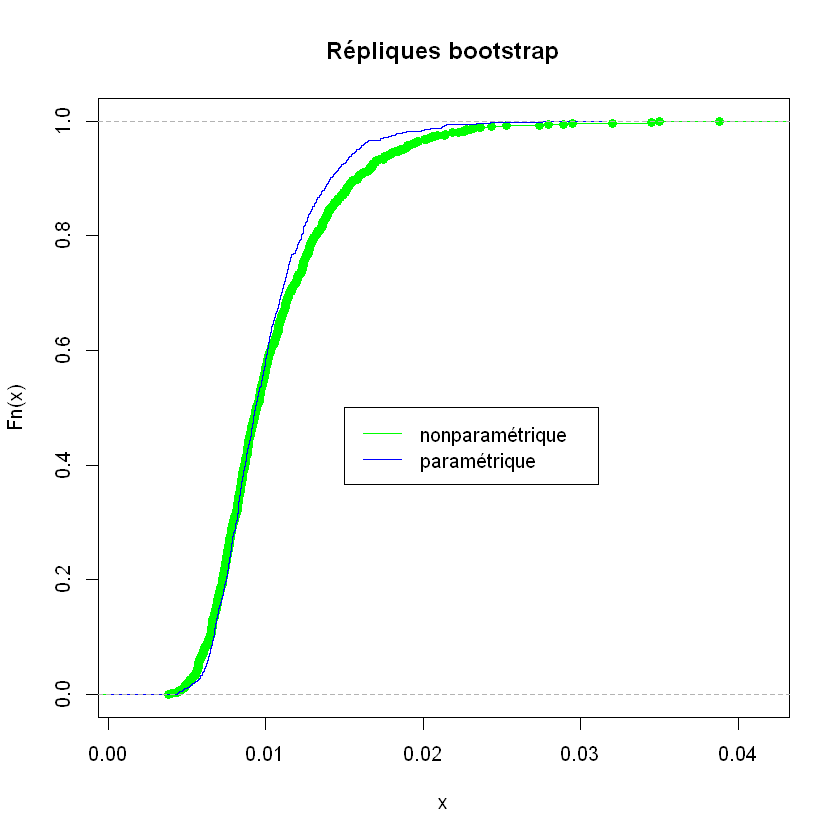

In [11]:
plot(ecdf(estim.np), col='green', main='Répliques bootstrap')
plot(ecdf(estim.exp), col='blue', add=TRUE)
legend(.015, .5, legend=c('nonparamétrique', 'paramétrique'), col=c('green', 'blue'), lty=1)

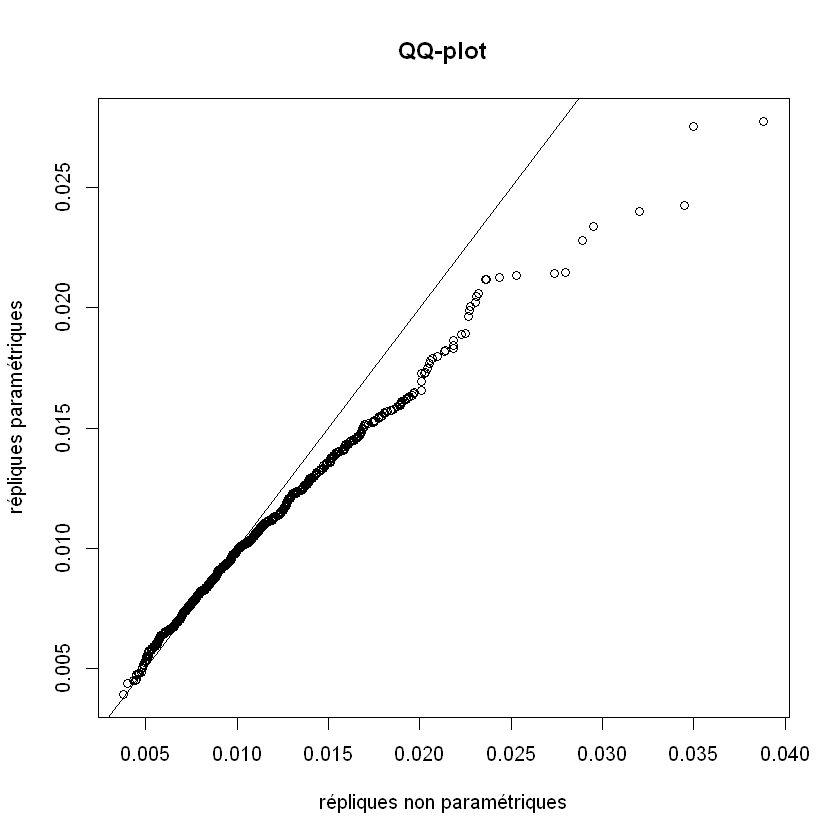

In [12]:
qqplot(estim.np, estim.exp, xlab='répliques non paramétriques', ylab='répliques paramétriques', main='QQ-plot')
abline(0, 1)

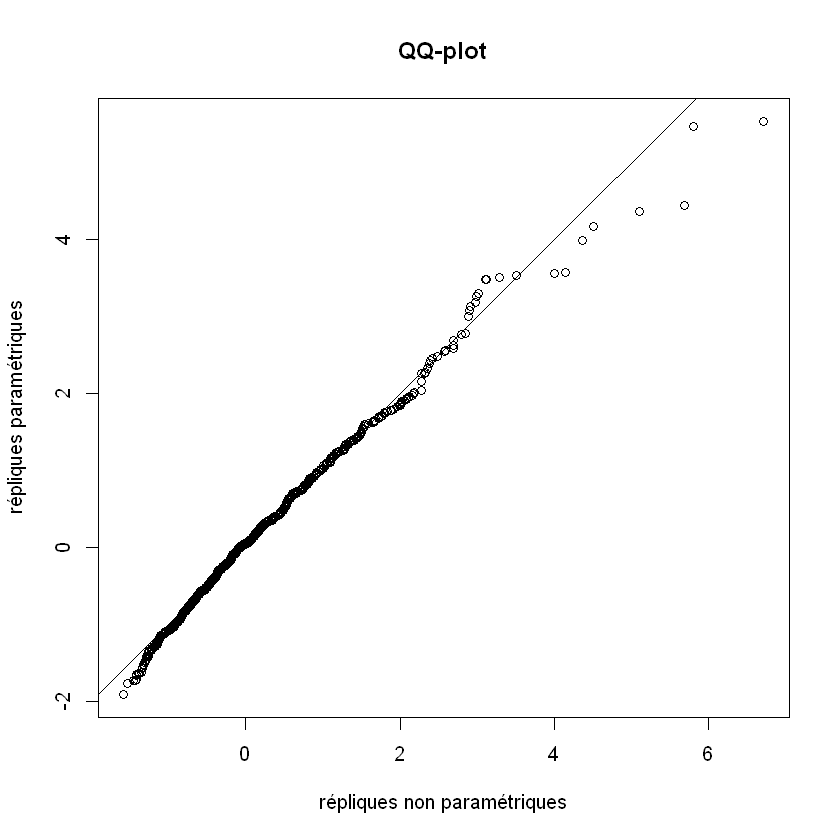

In [13]:
qqplot(centreduit(estim.np), centreduit(estim.exp), xlab='répliques non paramétriques', ylab='répliques paramétriques', main='QQ-plot')
abline(0, 1)

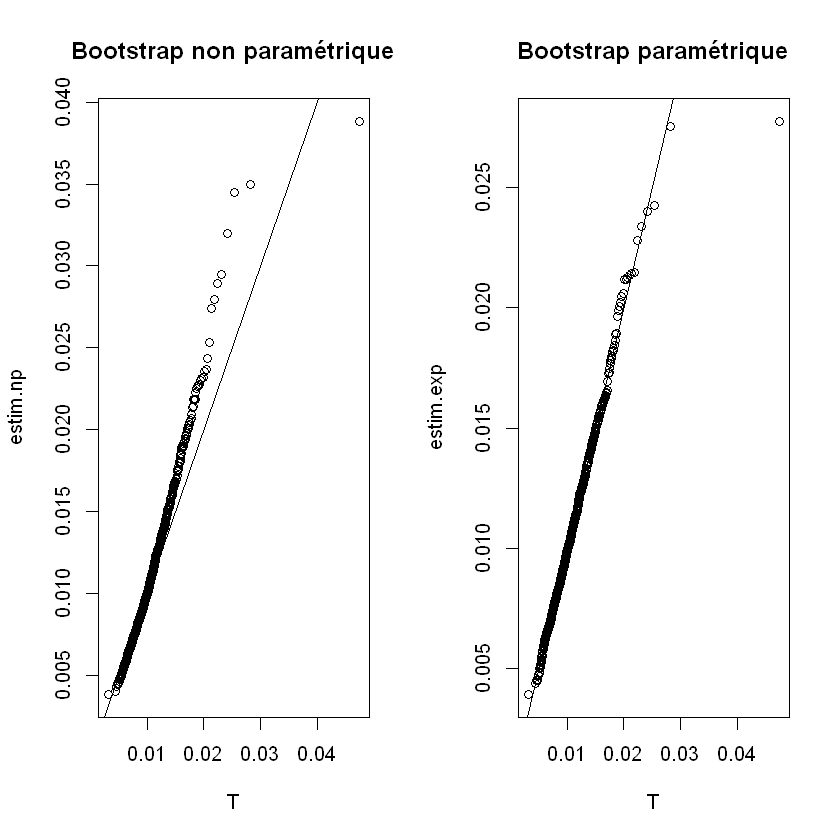

In [14]:
n <- length(aircond)
theta <- 1/mean(aircond)
T <- estim.T(theta, n, 100000)
par(mfrow=c(1, 2))
qqplot(T, estim.np, main='Bootstrap non paramétrique')
abline(0,1)
qqplot(T, estim.exp, main='Bootstrap paramétrique')
abline(0,1)

Réponse
Dans les deux cas (param. et non param.), la loi des répliques bootstrap est unimodale et exhibe une certaine asymétrie (histogrammes). La loi n'est pas une loi normale (QQ-plots).
Les deux vecteurs ont à peu près la même loi, car les fonctions de répartition empirique sont proches. Les points du QQ-plot des données centrées-réduites s'alignent bien sur la première bissectrice, ce qui indique que les lois sont les mêmes à une transformation affine près. Donc, il n'y a pas une grande différence entre la loi de l'estimateur bootstrap  T∗  dans le cas bootstrap paramétrique et dans le cas bootstrap non paramétrique.
Avec les deux approches bootstrap la loi de  T∗  est relativement proche de celle de  T , car les points des deux dernières QQ-plots sont près de la première bissectrice.
L'approximation obtenue avec le bootstrap paramétrique est même très bonne.

# Bootstrap : un contre-exemple

Soit $X_1,\dots,X_n$ un échantillon de variables i.i.d. de loi uniforme  $U(\theta, \theta+ 1)$ pour $\theta\in\mathbb R$.

On considère l'estimateur $T_n = X_{(1)} = \min\{X_i,\dots, X_n\}$ de $\theta$. On s'intéresse à la distribution de la statistique
$$L_n  = n(T_n  −  \theta).$$

On peut prouver rigoureusement le résultat asymptotique suivant :
$$L_n\stackrel{\mathcal L}{\longrightarrow}\mathcal E(1),\qquad\text{lorsque }n\to\infty.$$

## Question 5
Vérifier à l'aide des simulations à partir de quelle taille d'échantillon $n$ l'approximation limite donnée ci-dessus est bonne. Pour cela :
- écrire une fonction **simul_min** qui simule un grand nombre d'échantillon $X_1,\dots,X_n$ sur lesquels la statistique $L_n$ est évaluée. Ensuite, on trace l'histogramme et un QQ-plot pour vérifier la loi de $L_n$.
- appeler votre fonction en variant la taille d'échantillon (p. ex. $n = 5, 10, 20, 50, 200 ,1000, 10000$). Commentez.



In [15]:
simul_min <- function(theta, n, R=1000){
  estim <- replicate(R, min(runif(n, theta, theta+1)))
  Ln <- n*(estim-theta)  
  par(mfrow=c(1, 2))
  hist(Ln, freq=FALSE)
  curve(dexp(x, 1),col=2, add=TRUE)
  qqplot(qexp((1:n)/n, 1), sort(Ln), xlab='Loi exponentielle')
  abline(0, 1)
  return(Ln)
}

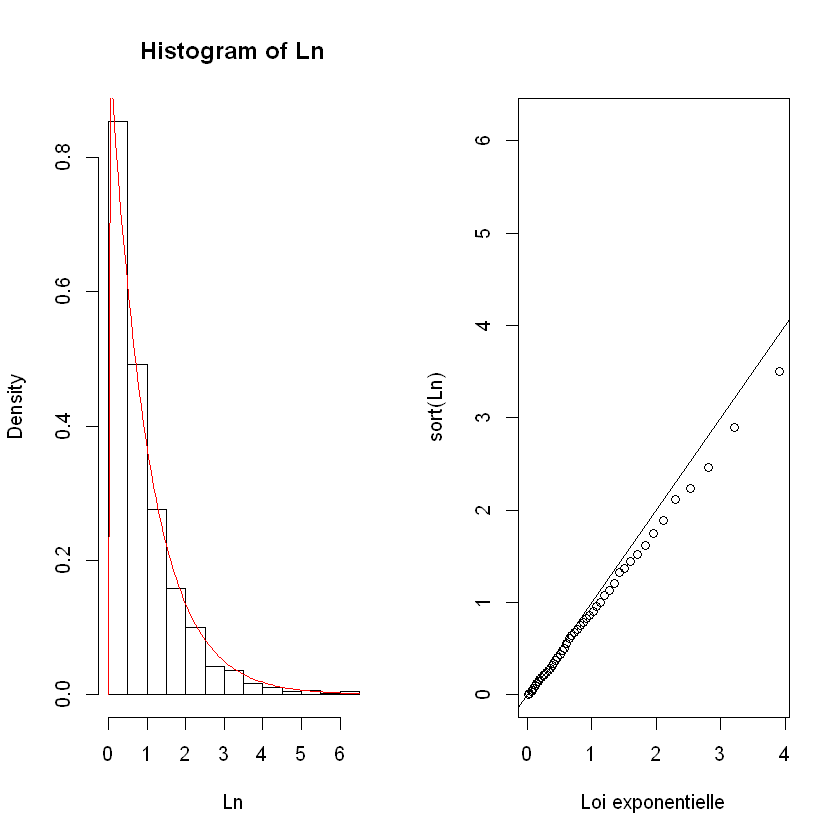

In [16]:
Ln <- simul_min(2, 50, 1000)

Maintenant nous voulons faire du bootstrap **non paramétrique** afin d'approcher la loi de la statistique $L_n$.

## Question 6

Ecrire une fonction **boot_min** similaire à la fontion **simul_min** qui prend en argument un échantillon et le nombre $R$ d'échantillons bootstrap à générer. Cette fonction trace l'histogramme et le QQ-plot des répliques bootstrap 
$L_n^*$. Qu'observez-vous en appelant cette fonction ? Obtient-on les mêmes résultats que par des simuations de la question précédente ? Interprétez.




In [17]:
boot_min <- function(obs, R=1000){
  estim <- replicate(R, min(sample(obs, replace=TRUE)))
  n <- length(obs)
  theta <- min(obs)
  Ln <- n*(estim-theta)  
  par(mfrow=c(1, 2))
  hist(Ln, freq=FALSE)
  curve(dexp(x, 1), col=2, add=TRUE)
  qqplot(qexp((1:n)/n, 1), Ln, xlab='Loi exponentielle')
  abline(0, 1)
  return(Ln)
}

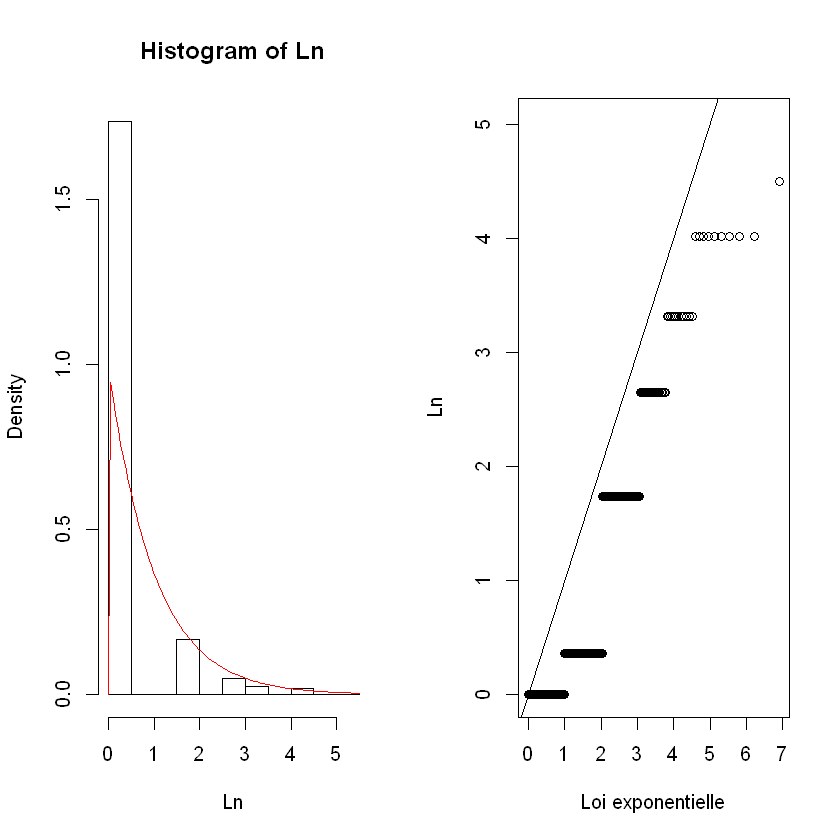

In [18]:
ln <- boot_min(runif(10000, 2, 3), 1000)

## Question 7
Pour mieux comprendre ce qui se passe en effectuant du bootstrap non paramétrique,  vérifier le nombre d’éléments différents dans le vecteur de répliques bootstrap $L^*_{n,r}, r=1,\dots,R$? Regardez pour des grandes valeurs de $n$ et de $R$. Expliquez.

[1] 0.000000 3.343591 4.834691 3.344556 5.316071 6.044853 5.634447 6.721972
[9] 6.051279

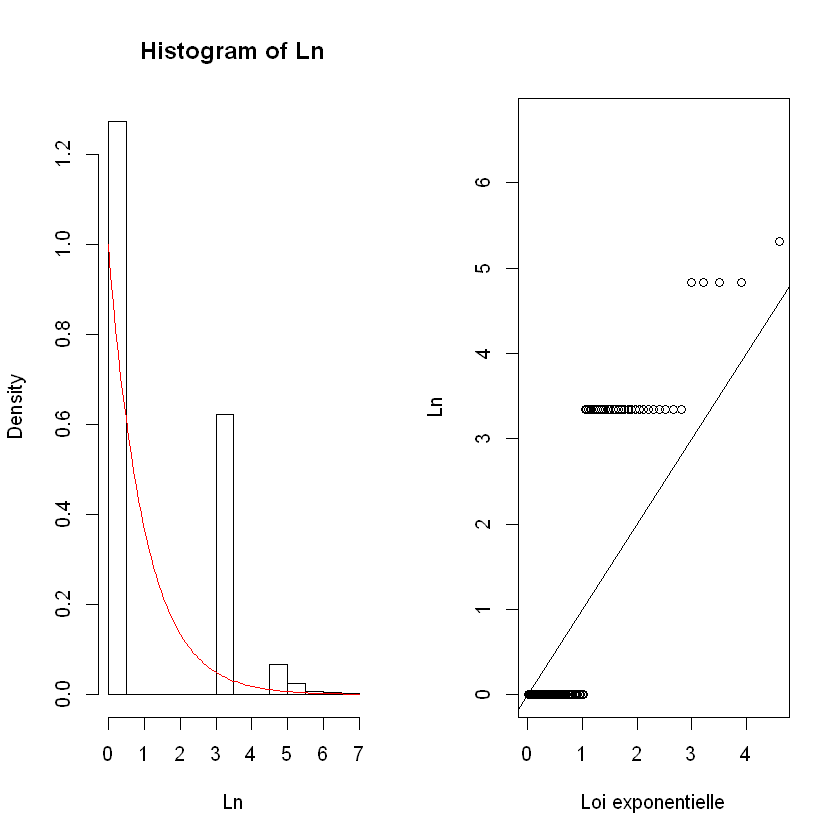

In [19]:
ln <- boot_min(runif(100, 2, 3), 1000)
unique(ln)

Est-ce que le bootstrap paramétrique fait mieux ?

## Question 8

Mettre en oeuvre le bootstrap paramétrique où l'échantillon bootstrap est tiré selon la loi uniforme $U[t,t+1]$ où $t=T(x_1,\dots,x_n)$ est la valeur observée de l'esimtateur $T$ sur les données. Tracer l'histogramme et le QQ-plot correspondant. Interpréter.



In [20]:
bootparam_min <- function(obs, R=1000){
  n <- length(obs)
  theta <- min(obs)
  estim <- replicate(R, min(runif(n, theta, theta+1)) )
  Ln <- n*(estim-theta)  
  par(mfrow=c(1, 2))
  hist(Ln, freq=FALSE)
  curve(dexp(x, 1), col=2, add=TRUE)
  qqplot(qexp((1:n)/n, 1), Ln, xlab='Loi exponentielle')
  abline(0, 1)
  return(Ln)
}

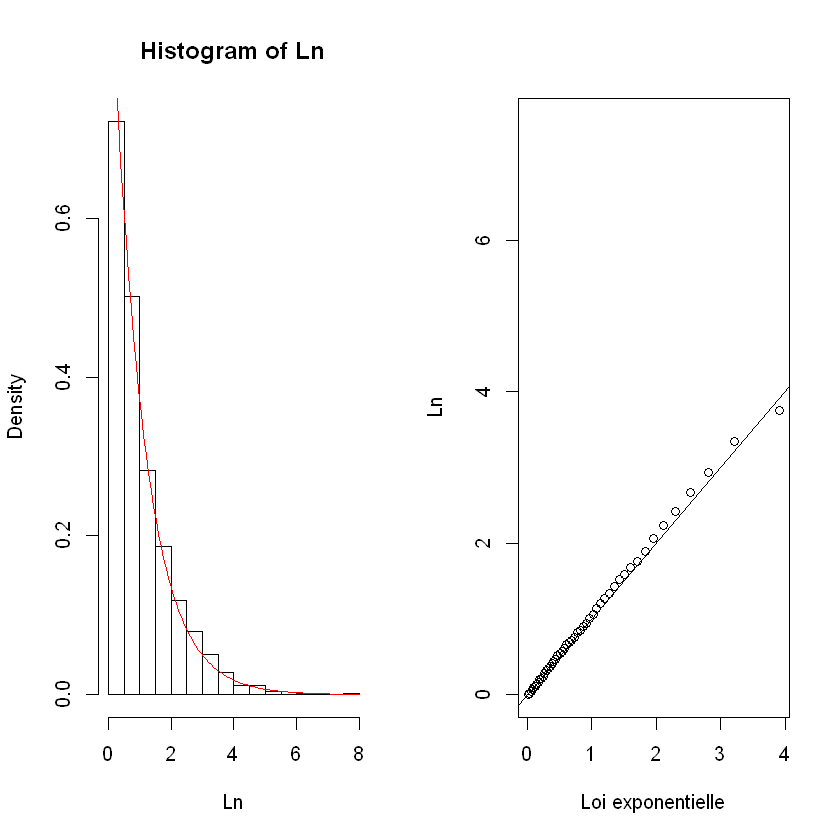

In [21]:
ln <- bootparam_min(runif(50, 2, 3), 1000)

# Intervalles de confiance bootstrap 

Dans  cette partie nous considérons   des réalisations  $x_1,\dots,x_n$ i.i.d. de loi exponentielle $\mathcal E(\theta)$ avec $\theta>0$, 
et l'estimateur $T=1/\bar X_n$. Notons $t=T(x_1,\dots,x_n)$ la valeur observée de l'estimateur sur les données.

Nous allons mettre en oeuvre les différents intervalles de  confiance par le bootstrap (ICB) vus en cours. 

Rappelons que le niveau de confiance **nominatif** d'un ICB est de $1-\alpha$ pour $\alpha$ fixé. Nous allons effectuer des simulations de Monte Carlo afin d'estimer le niveau de confiance **effectif** d'un ICB $\mathcal I^*$, c'est-à-dire déterminer la quantité
$$\mathbb P_\theta(\theta\in\mathcal I^*)$$
et comparer cette valeur à la valeur nominative de $1-\alpha$ afin de juger la qualité de l'intervalle.



## Par approximation normale
L'ICB de niveau $1-\alpha$ qui repose sur une approximation par la loi normale est donné par 
$$\mathcal I^*_{\text{norm}} = \left[t-\beta_B^*-\sqrt{v^*_B}z_{1-\alpha/2},t-\beta_B^*-\sqrt{v^*_B}z_{\alpha/2} \right],$$
où $z_{\alpha/2}$ et $z_{1-\alpha/2}$ désignent les quantiles de la loi normale standard $\mathcal N(0,1)$ et $\beta_B^*$ et $v^*_B$ sont les estimateurs bootstrap du biais et de la variance de l'estimateur $T$ définis par
$$\beta_B^*=\bar T^*-t,\qquad
v^*_B = \frac1B\sum_{b=1}^B(T^{*(b)}-\bar T^*)^2,\qquad \text{ où } \quad\bar T^*=\frac1B\sum_{b=1}^BT^{*(b)},$$
et $T^{*(b)},b=1,\dots,B$ sont $B$ répliques bootstrap (paramétrique ou non paramétrique) de $T$.

## Question 9
- Ecrire une fonction **biais.var.boot** pour calculer les estimteurs bootstrap du biais et de la variance $\beta_B^*$ et $v^*_B$. Cette fonction  prend en argument un vecteur d'observations **obs**, le nombre $B$ de répliques bootstrap $T^{*(b)}$ à générer et une variable **param** de type booléan. Elle renvoie les estimateurs bootstrap $\beta_B^*$ et $v^*_B$. Selon la valeur de **param** on utilisera des échantillons bootstrap paramétrique ou non paramétrique.
- Faites quelques essais sur des données simulées pour choisir une bonne valeur du nombre $B$ d'échantillons bootstrap à utiliser dans la fonction **biais.var.boot**.
- Ecrire une fonction **icb.norm** qui renvoie les limites de l'ICB $\mathcal I^*_{\text{norm}}$. Elle prend en argument les données, le niveau $\alpha$, le nombre de répliques bootstrap $B$ de l'esitmateur $v^*_B$ et un booléan **param** pour le type de bootstrap à utiliser.
- Ecrire une fonction **niveau.icbnorm** pour faire des simulations de Monte Carlo pour estimer le niveau de confiance effectif $\mathbb P_\theta(\theta\in\mathcal I^*_{\text{norm}})$. Plus présisément, cette fonction
    - génère un grand nombre de jeux de données $x_1,\dots,x_n$ de  loi exponentielle $\mathcal E(\theta)$, 
    - calcule l'ICB $\mathcal I^*_{\text{norm}}$ sur chacun de ces jeux de données,
    - et estime la proportion d'ICB qui contiennent la vraie valeur du paramètre $\theta$.
- Faites des simulations Monte Carlo avec différents paramètres. 
Que dire de la qualité de l'intervalle $\mathcal I^*_{\text{norm}}$ ? Comparer les performances de l'approche bootstrap paramétrique et non paramétrique. 




In [22]:
biais.var.boot <- function(obs, B, param=FALSE){
    if (param)
        estim.boot <- boot.exp(obs, B)
    else
        estim.boot <- boot.np(obs, B)
    b <- mean(estim.boot)- 1/mean(obs)
    v <- var(estim.boot)    
    return(list(biais = b, var = v))
}

In [23]:
obs <- rexp(15, .1)

In [24]:
biais.var.boot(obs, 300, param=TRUE)

$biais
[1] 0.006954815

$var
[1] 0.001127403

In [25]:
biais.var.boot(obs, 300, param=TRUE)

$biais
[1] 0.009906355

$var
[1] 0.001166983

In [26]:
icb.norm <- function(obs, alpha=.05, B=300, param=FALSE){
    bv <- biais.var.boot(obs, B, param)
    theta <- 1/mean(obs)
    return(theta-bv$biais -sqrt(bv$var)*qnorm(1-alpha/2)*c(1, -1))
}

In [27]:
icb.norm(obs, param=FALSE)

[1] 0.03649016 0.16740497

In [28]:
niveau.icbnorm <- function(theta, n, M, alpha=0.05, param=FALSE){
    prop <- 0
    for (i in 1:M){
        obs <- rexp(n, theta)
        icb <- icb.norm(obs, alpha, param=param)
        prop <- prop + ((icb[1]<theta)&(theta<icb[2]))
    }
    return(prop/M)
}

In [29]:
niveau.icbnorm(2, 10, 1000, param=TRUE)

[1] 0.958

In [30]:
niveau.icbnorm(1/mean(aircond), 12, 1000, param=TRUE)

[1] 0.969

In [31]:
niveau.icbnorm(.02, 10, 1000, param=FALSE)

[1] 0.937

On a tjr des valeurs proche de 0.95

## ICB de base

L'intervalle de confiance par bootstrap de base est définit par
$$\mathcal I^*_{\text{basic}} = \left[2t-T^*_{(\gamma_1)}, 2t-T^*_{(\gamma_2)} \right],$$
où $T^*_{(s)}$ désigne la $s$-ième statistique d'ordre associée aux répliques bootstrap $T^*_1,\dots,T^*_R$ et $$\gamma_1=\left\lceil\left(1-\frac\alpha 2\right)R\right\rceil\qquad\text{ et }\qquad\gamma_2=\left\lceil \frac\alpha2R\right\rceil.\qquad\qquad\qquad(*)$$ 

## Question 10
- Ecrire une fonction **icb.basic** pour calculer les limites de l'ICB $\mathcal I^*_{\text{basic}}$ pour un échantillon donné.
- Estimer le niveau de confiance effectif de cet intervalle en utilisant des simulations de Monte Carlo comme à la quesiton précédente.



In [32]:
icb.basic <- function(obs, alpha=.05, R=1000, param=FALSE){
    gamma <- c(1-alpha/2, alpha/2)
    theta <- 1/mean(obs)
    if (param)
        estim.boot <- boot.exp(obs, R)
    else
        estim.boot <- boot.np(obs, R)
   quant <- as.numeric(quantile(estim.boot, gamma))
    return(2*theta-quant)
}

In [33]:
icb.basic(obs, param=TRUE)

[1] 0.01733497 0.14725151

In [34]:
niveau.icbbasic <- function(theta, n, M, alpha=0.05, param=FALSE){
    prop <- 0
    for (i in 1:M){
        obs <- rexp(n, theta)
        icb <- icb.basic(obs, alpha, param=param)
        prop <- prop + ((icb[1]<theta)&(theta<icb[2]))
    }
    return(prop/M)
}

In [35]:
niveau.icbbasic(.2, 10, 1000, param=TRUE)

[1] 0.878

In [36]:
niveau.icbbasic(.2, 50, 1000, param=FALSE)

[1] 0.926

on remarque une augmentation ici avec un niveau en dessous de la valeur nominatif.

In [37]:
niveau.icbbasic(.2, 50, 1000, param=FALSE)

[1] 0.913

In [38]:
niveau.icbbasic(.2, 50, 1000, param=TRUE)

[1] 0.935

## ICB studentisé

L'ICB studentisé est définit par
$$\mathcal I^*_{\text{stud}} = \left[t-\sqrt{v_R^*}Z^*_{(\gamma_1)}, t-\sqrt{v_R^*}Z^*_{(\gamma_2)} \right],$$
avec $\gamma_1$ et $\gamma_2$ donnés en $(\ast)$ et
$$Z^*_r = \frac{T^*_r-t}{\sqrt{v^*_{r,B}}},$$
où $v^*_{r,B}$ désigne l'estimateur bootstrap de la variance de $T$ associée au $r$-ième échantillon bootstrap $x^*_{r,1},\dots,x^*_{r,n}$ (double bootstrap).

## Question 11
- Ecrire une fonction **icb.stud** pour calculer les limites de l'ICB $\mathcal I^*_{\text{stud}}$ pour un échantillon donné.
- Estimer le niveau de confiance effectif de cet intervalle en utilisant des simulations de Monte Carlo.


In [39]:
icb.stud <- function(obs, alpha=.05, R=300, B=50, param=FALSE){
    gamma <- c(1-alpha/2, alpha/2)
    theta <- 1/mean(obs)
    n <- length(obs)
    estim.boot <- rep(NA, R)
    Z <- rep(NA, R)
    for (i in 1:R){
        if (param)
            obs.boot <- rexp(n, theta)
        else    
            obs.boot <- sample(obs, replace=TRUE)            
        estim.boot[i] <- 1/mean(obs.boot)
        var.boot <- biais.var.boot(obs.boot,B)$var
        Z[i] <- (estim.boot[i]-theta)/sqrt(var.boot)
    }
    quant <- as.numeric(quantile(Z, gamma))
    var.boot <- var(estim.boot)
    return(theta-sqrt(var.boot)*quant)
}

In [40]:
icb.stud(obs, param=TRUE, R=1000)

[1] 0.05130774 0.18420369

In [41]:
niveau.icbstud <- function(theta, n, M, alpha=0.05, param=FALSE){
    prop <- 0
    for (i in 1:M){
        obs <- rexp(n, theta)
        icb <- icb.stud(obs, alpha, param=param)
        prop <- prop + ((icb[1]<theta)&(theta<icb[2]))
    }
    return(prop/M)
}

In [42]:
niveau.icbstud(2, 10, 100, param=TRUE)

[1] 1

In [43]:
niveau.icbstud(2, 10, 100, param=FALSE)

[1] 0.92

In [44]:
niveau.icbstud(.2, 30, 100, param=TRUE)

[1] 0.97

In [45]:
niveau.icbstud(.2, 30, 100, param=FALSE)


[1] 0.97

bootstrap paramétrique donne des niveaux de confiance plus élevés et Augmenter la taille d'échantillon implique que le niveau effectif s'approche du niveau nominatif.

## Méthode des percentiles de base
L'ICB par la méthode des percentiles de base est définit par
$$\mathcal I^*_{\text{perc}} = \left[T^*_{(\gamma_2)}, T^*_{(\gamma_1)} \right].$$

## Question 12
- Ecrire une fonction **icb.perc** pour calculer les limites de l'ICB $\mathcal I^*_{\text{perc}}$ pour un échantillon donné.
- Estimer le niveau de confiance effectif de cet intervalle en utilisant des simulations de Monte Carlo.



In [46]:
icb.perc <- function(obs, alpha=.05, R=1000, param=FALSE){
    gamma <- c(alpha/2, 1-alpha/2)
    if (param)
        estim.boot <- boot.exp(obs, R)
    else
        estim.boot <- boot.np(obs, R)
    quant <- as.numeric(quantile(estim.boot, gamma))
    return(quant)
}

In [47]:
icb.perc(obs)

[1] 0.07117268 0.19542185

In [48]:
niveau.icbperc <- function(theta, n, M, alpha=0.05, param=FALSE){
    prop <- 0
    for (i in 1:M){
        obs <- rexp(n, theta)
        icb <- icb.perc(obs, alpha, param=param)
        prop <- prop + ((icb[1]<theta)&(theta<icb[2]))
    }
    return(prop/M)
}

In [49]:
niveau.icbperc(2, 10, 1000, param=FALSE)

[1] 0.852

In [50]:
niveau.icbperc(2, 10, 1000, param=TRUE)

[1] 0.921

In [51]:
niveau.icbperc(2, 30, 1000, param=FALSE)

[1] 0.927

In [52]:
niveau.icbperc(2, 30, 1000, param=TRUE)

[1] 0.929

Comme précédemment juste les niveaux effectis observés sont en-dessous du niveau nominatif.

## Question 13

Au vu de vos résultats de simulation comparer la performance des différents types d'intervalles de confiance et expliquer leur différences. Quelle approche, paramétrique ou non paramétrique, donne des meilleurs performances (dans le cadre étudié ici) ?


## Question 14
Calculer les différents intervalles de confiance pour les données **aircond** et comparer-les.

In [53]:
icb.norm(aircond)

[1] -0.001951724  0.017352027

In [54]:
icb.basic(aircond)

[1] -0.002222944  0.013239061

In [55]:
icb.stud(aircond)

[1] 0.001031977 0.019434559

In [56]:
icb.perc(aircond)

[1] 0.005283552 0.021938847